# Häslostudie

I denna analys undersöker vi data från en hälsostudie. Målet är att identifiera riskfaktorer för sjukdom och högt blodtryck. Vi använder en egenskapad klass, `HealthAnalyzer`, för att strukturera arbetet.


In [7]:
from health_utils import HealthAnalyzer
file_path = "data/health_study_dataset.csv" 
analyzer = HealthAnalyzer(file_path)

analyzer.show_basic_info()

Data laddad! Rader: 800


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


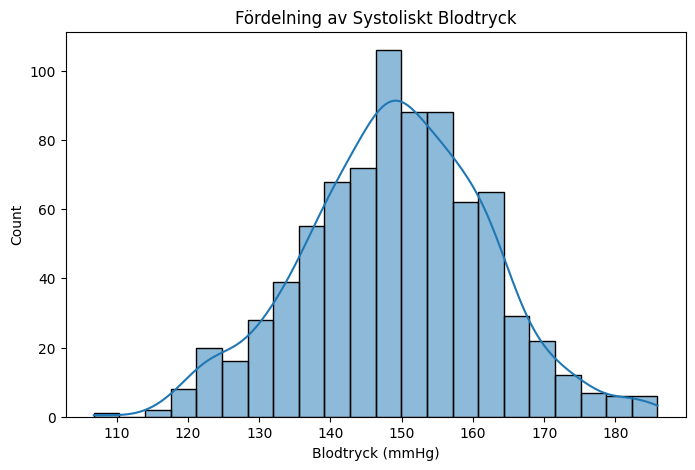

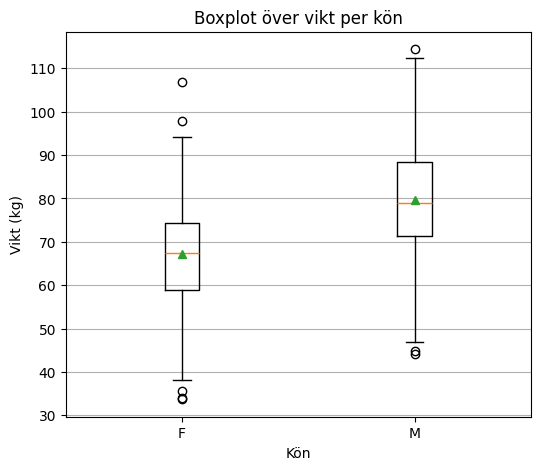

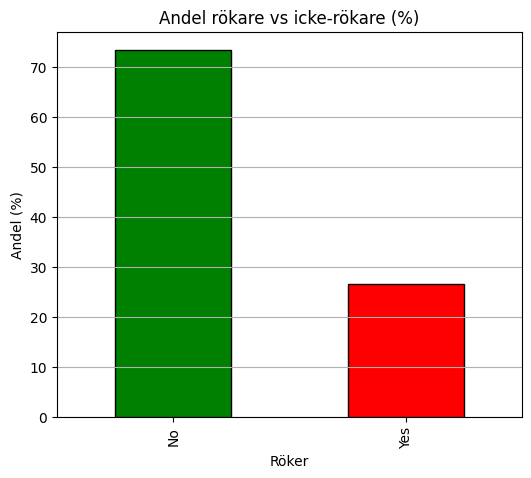

smoker
No     587
Yes    213
Name: count, dtype: int64


In [8]:
# Histogram över systoliskt blodtryck
analyzer.plot_blood_pressure_distribution()
# Boxplot över vikt per kön
analyzer.weight_defined_by_sex()
# Andelen rökar vs icke rökare i %
analyzer.percentage_of_smokers()

# Simulering av 1000 personer för att se hur många i simuleringen som har sjukdomen

In [9]:
# Simulering av 1000 personer för att se hur många i simuleringen som har sjukdomen
analyzer.simulated_sickness_mean()

Andel med sjukdomen i datasetet: 0.059
Andel med sjukdomen i simuleringen: 0.056


Simulering visar att det är ungefär lika vanligt att ha sjukdomen som i datasetet. 


# Här beräknas ett konfidensintervall för medelvärdet av systolic_bp med hjälp av Boostrap metoden

--- Bootstrap-analys av Blodtryck (5000 iterationer) ---
Stickprovsmedelvärde: 149.18 mmHg
95% Konfidensintervall: (148.34, 150.08) mmHg


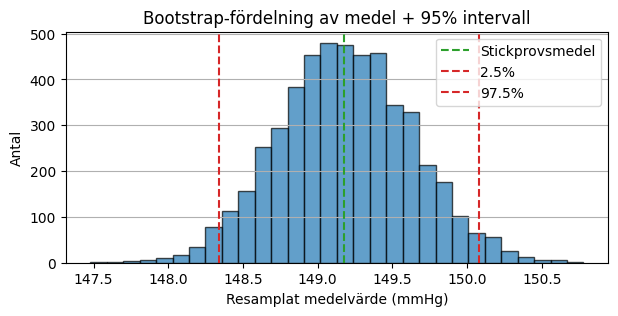

In [10]:
# Bootstrap-analys av Blodtryck (5000 iterationer)
analyzer.analyze_bp_bootstrap()

Vi ser att fördelningen ser normal ut och vi kan lita på den.

# Hypotesen - Rökare har högre blodtryck än icke rökare

Vi undersöker om rökare har högre blodtryck än icke rökare

Welch t-test: t = 0.450, p-värde = 0.6527


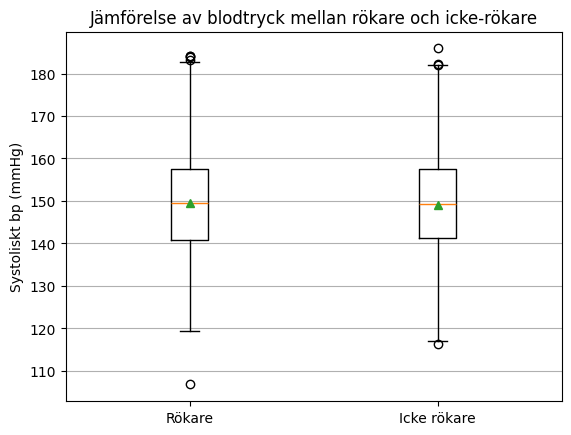

In [11]:
# Welch t-test på jämförelse av blodtryck mellan rökare och icke rökare
analyzer.hypothesis_smokers()

Welch's t-test utfördes ovan och utifrån ett p värde på 0.6527 (som är mycket högre än 0,05) så finns det inget som stödjer den hypotesen att rökare skulle ha högre blodtryck statistikt sätt.



# Samband mellan Ålder och Blodtryck

Vi vill undersöka om det finns en linjär korrelation mellan en persons ålder och deras systoliska blodtryck. Vi använder linjär regression för att modellera detta samband


            -- Linjär regression: --
            intercept = 122.68
            slope = 0.54
            R² = 0.369
            prognos vid 50 år = 149.5
        


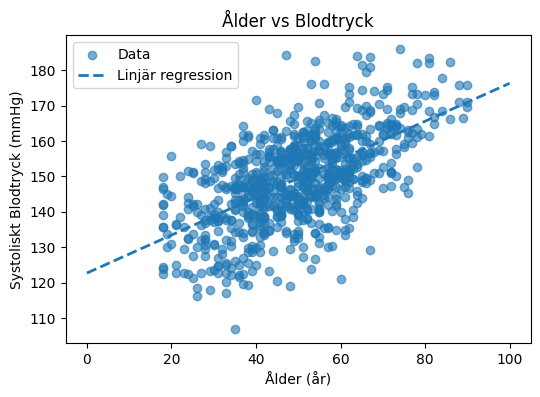

In [12]:
# Linjär regression Ålder vs Blodtryck
analyzer.linear_regression()


Modellen förutspår ett blodtryck på ca 150 mmHg vid 50 års ålder

Vilket indikerar att denna grupp ligger i riskzonen för hypertoni.

# Analys av BMI och sjukdomsförekomst

Datasetet innehåller längd och vikt, men inte BMI. Vi skapar en ny variabel för BMI (Body Mass Index) och jämför fördelningen mellan friska och sjuka deltagare för att se om högre BMI är kopplat till sjukdomen.


            --- BMI-analys ---
            Snitt-BMI Friska: = 24.9
            Snitt-BMI Sjuka: = 25.3
        


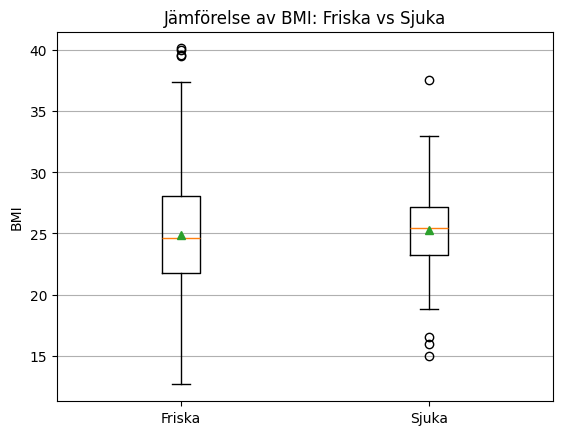

In [13]:
# Jämförelse av BMI: Friska vs Sjuka
analyzer.analyze_bmi_disease()

Analys av BMI: Friska vs Sjuka:

Tendensen är att sjuka har ett litet högre BMI än friska.
Sjuka ligger precis över gränsen till fetma, men det är ingen dramatisk skillnad.